<a href="https://colab.research.google.com/github/itaewonflow/lecture-machine-learning/blob/main/model_naivebayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reference Module
- Google Mount

In [1]:
from google.colab import drive
drive.mount('/gdrive')
ROOT_PATH = '/gdrive/MyDrive/textdata/'
# test_data = pd.read_csv(ROOT_PATH + '/ratings_test.txt', sep='\t')

ModuleNotFoundError: No module named 'google.colab'

# Naive Bayes Model Practice
- Email Spam Classifier Using

- Data Set, Enron Email Data, Preprocessed Format
- https://www2.aueb.gr/users/ion/data/enron-spam/preprocessed/enron1.tar.gz
- 3,672개의 정상 메일, 1,500개의 스팸 메일로 구성
- ham: 정상 메일이 담긴 폴더
- spam: 스팸메일이 담긴 폴더

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

- 스팸화일과 정상메일의 TXT화일을 분리한다.
- 각 화일의 폴더 위치 지정

In [5]:
emails, labels =[], []

#폴더명 다운로드 후 압축이 풀어진 폴더를 지정한다.
paths = ["./spam/", "./ham/"]
for path in paths:
    for filename in glob.glob(os.path.join(path, "*.txt")):
        with open(filename, "r", encoding="ISO-8859-1") as file:
            emails.append(file.read())
            if path.endswith("spam/"):
                labels.append(1)
            else:
                labels.append(0)
print(np.unique(labels, return_counts=True))

(array([0, 1]), array([3672, 1500], dtype=int64))


- 전처리를 위한 NLTK 사용
- 숫자, 구두점, 사람 이름 제거

In [8]:
!pip install nltk
import nltk

nltk.download("names")
nltk.download("wordnet")

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     --------------- ------------------------ 0.6/1.5 MB 18.2 MB/s eta 0:00:01
     ---------------------------- ----------- 1.1/1.5 MB 13.5 MB/s eta 0:00:01
     ---------------------------------------  1.5/1.5 MB 13.6 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 10.6 MB/s eta 0:00:00
  Obtaining dependency information for click from https://files.pythonhosted.org/packages/1a/70/e63223f8116931d365993d4a6b7ef653a4d920b41d03de7c59499962821f/click-8.1.6-py3-none-any.whl.metadata
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/de/cd/d80c9e284ae6c1b2172dacf0651d25b78ee1f7efbc12d74ea7b87c766263/regex-2023.8.8-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB ? eta 0:00:00
  Obtaining dependency information for tqdm from https:/

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\서디_C강의장_PC13\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\names.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\서디_C강의장_PC13\AppData\Roaming\nltk_data...


True

In [9]:
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

In [10]:
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

cleaned_emails = []
for email in emails:
    cleaned_emails.append(" ".join([lemmatizer.lemmatize(word.lower()) for word in email.split() if word.isalpha() and word not in all_names]))

- CountVectorizer를 이용해 단어의 벡터화
- 불용어 제거와 단어의 출현 빈도 특징을 추출

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words="english", max_features=500)
term_docs = vectorizer.fit_transform(cleaned_emails)
print(term_docs[0])

  (0, 125)	2
  (0, 178)	2
  (0, 47)	1
  (0, 497)	1
  (0, 231)	1
  (0, 445)	1
  (0, 345)	1
  (0, 250)	1
  (0, 424)	1
  (0, 285)	1
  (0, 69)	1
  (0, 357)	1
  (0, 481)	1


In [12]:
term_docs.toarray()

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
feature_names = vectorizer.get_feature_names_out()
len(feature_names)

500

In [15]:
feature_names[481], feature_names[357]

('website', 'read')

- 훈련 데이터와 테스트 데이터의 분리 및 생성

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_emails, labels, test_size=0.3, random_state=35)

#아래 내용 하는 이유?
term_docs_train = vectorizer.fit_transform(X_train)
term_docs_test = vectorizer.transform(X_test)

- 나이브베이즈 모델 사용
- MultimoniaNB 사용

- alpha 매개변수는 Naive Bayes 분류기에서 사용되는 스무딩(smoothing) 기법을 조절하는 하이퍼파라미터입니다. Naive Bayes 분류기는 각 특성의 확률 분포를 추정하기 위해 데이터를 사용하는데, 때로는 특정한 특성 값에 대한 확률이 0이 되어 추정이 어려운 경우가 발생할 수 있습니다. 이러한 상황을 처리하기 위해 스무딩이라는 기법을 사용합니다.
- alpha 값이 작을수록 스무딩이 강화되며, 훈련 데이터에서 나타난 빈도를 크게 고려합니다. 이는 더 정확한 훈련 데이터에 민감하게 반응하지만, 새로운 데이터에 대한 일반화 능력이 떨어질 수 있습니다.
- alpha 값이 클수록 스무딩이 약화되며, 모든 특성 값에 대해 비슷한 확률을 부여합니다. 이는 훈련 데이터의 노이즈에 덜 민감하게 만들어주지만, 훈련 데이터의 빈도 정보를 덜 활용하게 될 수 있습니다.

- fit_prior 매개변수는 Naive Bayes 분류기에서 클래스 레이블의 사전 분포를 고려할지 여부를 결정하는 데 사용되는 매개변수입니다. Naive Bayes 분류기는 데이터에 대한 사전 지식으로부터 클래스 레이블의 확률을 추정하는데, 이때 클래스의 사전 분포 정보를 사용할지를 결정합니다.
- fit_prior=True: 이 옵션을 선택하면 클래스 레이블의 사전 분포를 고려하여 클래스 확률을 추정합니다. 즉, 각 클래스의 발생 빈도에 따라서 사전 확률을 조정하게 됩니다. 더 자주 나타나는 클래스는 더 높은 사전 확률을 가지게 됩니다. 이는 일반적으로 데이터에 실제 클래스 레이블의 빈도가 반영된 모델을 만들 때 사용됩니다.
- fit_prior=False: 이 옵션을 선택하면 클래스 레이블의 사전 분포를 무시하고 모든 클래스를 동등한 확률로 취급하여 추정합니다. 이 경우 모든 클래스에 대한 사전 확률은 동일하게 설정됩니다. 이 옵션은 클래스 레이블의 빈도 정보를 무시하고 각 클래스를 동등한 가중치로 다루어야 할 때 사용될 수 있습니다.

In [17]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB(alpha=1, fit_prior=True)

naive_bayes.fit(term_docs_train, y_train)
y_pred = naive_bayes.predict(term_docs_test)
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([1060,  492], dtype=int64))

In [18]:
naive_bayes.score(term_docs_test, y_test)

0.9117268041237113

In [19]:
y_pred_proba = naive_bayes.predict_proba(term_docs_test)

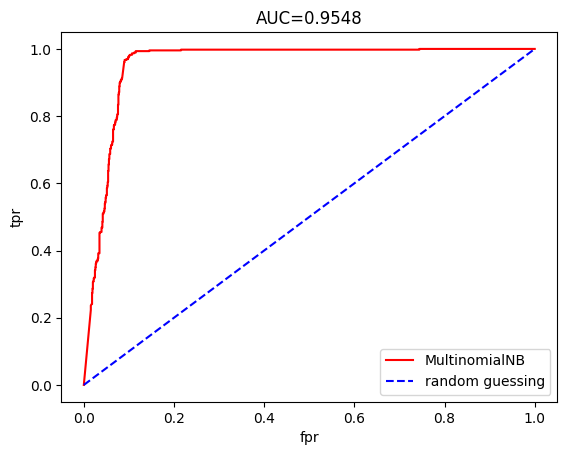

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ =roc_curve(y_test, y_pred_proba[:, 1])
auc = roc_auc_score(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, "r-", label="MultinomialNB")
plt.plot([0, 1], [0, 1], "b--", label="random guessing")
plt.title("AUC={:.4f}".format(auc))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()

In [21]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "alpha": [0.5, 1.0, 1.5, 2.0],
    "fit_prior": [True, False]
}
grid_search = GridSearchCV(naive_bayes, parameters, n_jobs=-1, cv=10, scoring="roc_auc")
grid_search.fit(term_docs_train, y_train)
grid_search.best_params_
naive_bayes_best = grid_search.best_estimator_
y_pred_proba = naive_bayes_best.predict_proba(term_docs_test)


UnicodeEncodeError: 'ascii' codec can't encode characters in position 18-19: ordinal not in range(128)

In [ ]:
y_pred_proba

array([[1.00000000e+00, 0.00000000e+00],
       [9.33961024e-01, 6.60389764e-02],
       [1.00000000e+00, 2.47667385e-39],
       ...,
       [1.00000000e+00, 8.77622637e-14],
       [9.98417717e-01, 1.58228326e-03],
       [3.28027188e-07, 9.99999672e-01]])

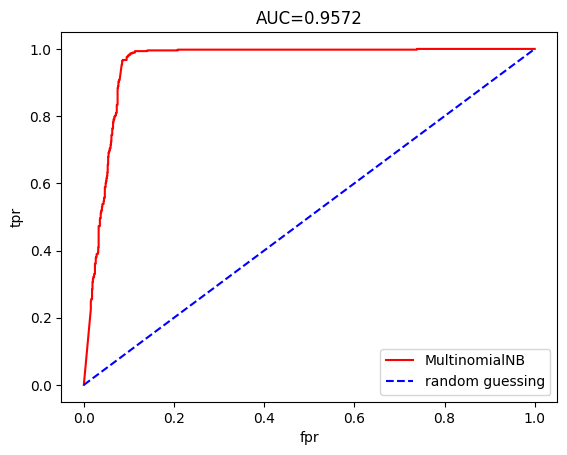

In [ ]:
fpr, tpr, _ =roc_curve(y_test, y_pred_proba[:, 1])
auc = roc_auc_score(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, "r-", label="MultinomialNB")
plt.plot([0, 1], [0, 1], "b--", label="random guessing")
plt.title("AUC={:.4f}".format(auc))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()